# Music Recommendation system

### CSE299.7 - Group 7 - Spring 2024

#### 👥Members

  |                          Name                            |     ID     |
  | -------------------------------------------------------- | ---------- |
  |  [Nafiz Haider Chowdhury](https://github.com/haiderCho)  | 1721587042 |
  |  [S.M Mahbubul Hasan](https://github.com/)  | 1921473642 |
  |  [Tasnova Tabassum](https://github.com/)    | 2121463642 |


---

### 🔗[GitHub Repo](https://github.com/haiderCho/CSE299-Project-MRS)

### Dependencies

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project/CSE299/spotify_millsongdata.csv")

### The first 10 rows of the DataFrame

In [ ]:
df.head(10)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \r\nYou're e..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \r\nCouldn't s...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \r\nI'm sitting all ...


### The last 10 rows of the DataFrame

In [ ]:
df.tail(10)

,artist,song,link,text
57640,Zebrahead,The Setup,/z/zebrahead/the+setup_10198494.html,Lie to me \r\nTell me that everything will be...
57641,Ziggy Marley,Freedom Road,/z/ziggy+marley/freedom+road_20531174.html,"That's why I'm marching, yes, I'm marching, \..."
57642,Ziggy Marley,Friend,/z/ziggy+marley/friend_20673508.html,[Chorus] \r\nI wanna thank you for the things...
57643,Ziggy Marley,G7,/z/ziggy+marley/g7_20531173.html,Seven richest countries in the world \r\nThem...
57644,Ziggy Marley,Generation,/z/ziggy+marley/generation_20531171.html,Many generation have passed away \r\nFighting...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...
57649,Zwan,Heartsong,/z/zwan/heartsong_20148991.html,come in \r\nmake yourself at home \r\ni'm a ...


### Dimensions of the DataFrame

In [ ]:
df.shape

(57650, 4)

### Missing values in the DataFrame

In [ ]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

### Artist Visulation

In [ ]:
import nltk
from textblob import TextBlob
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon')

# Create the music dataset frame (update according to the actual name of your dataset)
Songs = df

# Group by artist and get the count
Songs_by_artist = Songs.groupby('artist').size().reset_index(name='n')

# Select the top 100 artists
top_100_artists = Songs_by_artist.nlargest(100, 'n')

# Create a WordCloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(dict(zip(top_100_artists['artist'], top_100_artists['n'])))

# Show the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


NameError: name 'df' is not defined

### Top Artists



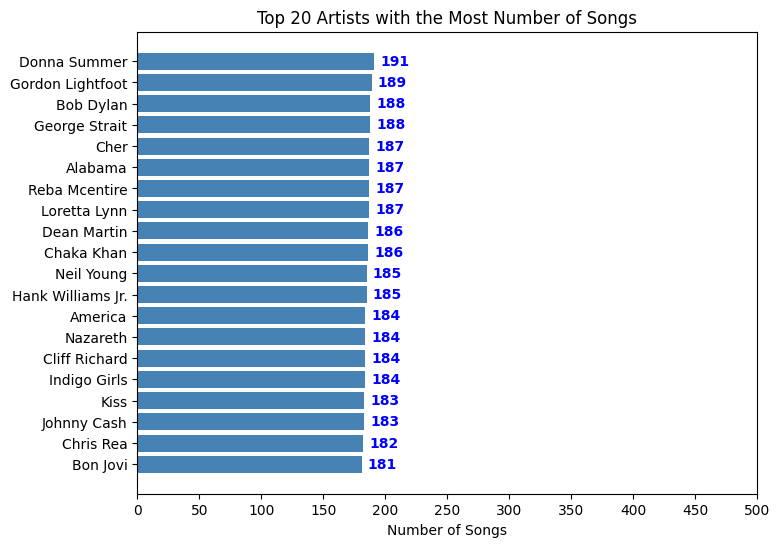

In [ ]:
# Create DataFrame from Songs
df = pd.DataFrame(Songs)

# Get the total number of songs for each artist
df = df.groupby('artist').size().reset_index(name='song')
df = df.sort_values(by='song', ascending=False).head(20)
df['artist'] = pd.Categorical(df['artist'], categories=df['artist'], ordered=True)

# Visualization
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(df['artist'], df['song'], color='steelblue')
ax.set_xlim(0, 500)
ax.set_xticks(range(0, 501, 50))
ax.set_xlabel('Number of Songs')
ax.set_title('Top 20 Artists with the Most Number of Songs')

# Display values
for bar in bars:
    xval = bar.get_width()
    ax.text(xval + 5, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center', color='blue', fontweight='bold')

plt.gca().invert_yaxis()  # Invert the y-axis
plt.show()


### Data Sample


In [ ]:
df = df.sample(5000).drop('link', axis=1).reset_index(drop=True)

ValueError: Cannot take a larger sample than population when 'replace=False'

### Sample dataFrame info

In [ ]:
df.head(10)

In [ ]:
df['text'][0]

In [ ]:
df = df.sample(5000)

In [ ]:
df.shape

### Lyrics Text Cleaning

In [ ]:
df['text'] = df['text'].str.lower().replace(r'^\w\s', ' ').replace(r'\n', ' ', regex = True)

### Lyrics Tokenizatoin

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def tokenization(txt):
    tokens = nltk.word_tokenize(txt)
    stemming = [stemmer.stem(w) for w in tokens]
    return " ".join(stemming)

### TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tfidvector = TfidfVectorizer(analyzer='word',stop_words='english')
matrix = tfidvector.fit_transform(df['text'])
similarity = cosine_similarity(matrix)

In [ ]:
similarity[0]

In [ ]:
df[df['song'] == 'California']

### Recommendation Function

In [ ]:
def recommendation(song_name, df, similarity, num_recommendations=10):
    if song_name not in df['song'].values:
        return "Song not found."

    idx = df[df['song'] == song_name].index[0]
    distances = sorted(list(enumerate(similarity[idx])), key=lambda x: x[1], reverse=True)

    songs = []
    for i in range(1, num_recommendations + 1):  # Start from 1 to skip the song itself
        if i < len(distances):  # Check to prevent index error
            song_id = distances[i][0]
            songs.append(df.iloc[song_id].song)
        else:
            break  # Exit loop if there are fewer songs than num_recommendations

    return songs

In [ ]:
song_name = 'California'
recommendations = recommendation(song_name, df, similarity)
print("Recommended Songs:")
for song in recommendations:
    print(song)

In [ ]:
import pickle
pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))